Dataset Shape: (569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_wors

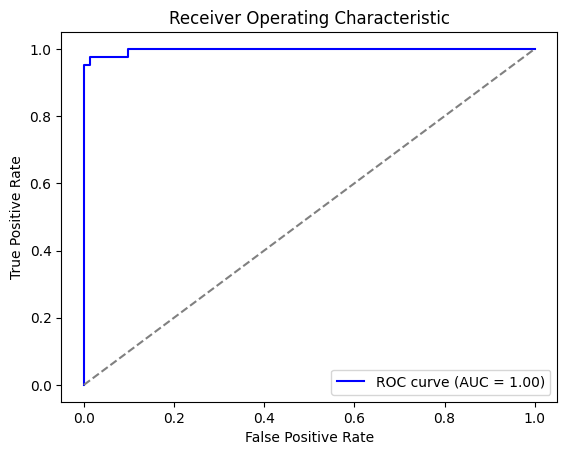


Sigmoid probabilities for first 5 samples: [1.13590250e-01 9.99990991e-01 9.96920905e-01 5.10134225e-04
 6.06389713e-05]

Confusion Matrix at threshold 0.3:
 [[67  4]
 [ 1 42]]
Precision: 0.9130434782608695
Recall: 0.9767441860465116


In [38]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score

#  Load Data
data = pd.read_csv(r"C:\Users\rines\Downloads\archive (12)\data.csv")  # change path if needed
print("Dataset Shape:", data.shape)
print(data.head())

#  Data Cleaning
# Drop unnecessary columns
data_clean = data.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Encode target (M=1, B=0)
data_clean['diagnosis'] = data_clean['diagnosis'].map({'M': 1, 'B': 0})

# Features and target
X = data_clean.drop(columns=['diagnosis'])
y = data_clean['diagnosis']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

#  Evaluation
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Precision, Recall, F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("\nPrecision:", precision)
print("Recall:", recall)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

#  Sigmoid Function Example
z_values = np.dot(X_test_scaled[:5], model.coef_[0]) + model.intercept_[0]
sigmoid_values = 1 / (1 + np.exp(-z_values))
print("\nSigmoid probabilities for first 5 samples:", sigmoid_values)

#  Threshold Tuning Example
threshold = 0.3  # Change threshold here
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

print(f"\nConfusion Matrix at threshold {threshold}:\n", confusion_matrix(y_test, y_pred_threshold))
print("Precision:", precision_score(y_test, y_pred_threshold))
print("Recall:", recall_score(y_test, y_pred_threshold))
